![title](Desktop/IPL.png)

In [2]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain

In [3]:
#Loading the team based insights dataset
data = pd.read_csv("C:/Users/lalit/Desktop/Numpy_Pandas_code/IPL/data.csv")
len(data)

577

In [3]:
#list of column names
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [4]:
#length of the Columns
len(data.columns)

18

In [56]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


#Exploratory Data Analysis on:-

1) Total number of teams participating (Team names and its size)
2) Details on Toss won by each team, Total Matches played so far, Total matches being won
3) Total number of matches won by each team (Bar plot Analysis)
4) Maximum Toss Won by the teams (Bar Plot Analysis)
5) Teams who had won Toss and Won the match
6) Building teh result summary statistics

In [61]:
#total number of teams participating (Team names)
team1_names = data.team1.unique()
team1_names.tolist()
team2_names = data.team2.unique()
team2_names.tolist()
total_teams = list(set(team1_names) & set(team2_names))
print (total_teams)
#Total number of teams participating (Team size)
print (len(total_teams))

['Pune Warriors', 'Kings XI Punjab', 'Sunrisers Hyderabad', 'Delhi Daredevils', 'Gujarat Lions', 'Rising Pune Supergiants', 'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Chennai Super Kings', 'Kochi Tuskers Kerala']
13


In [62]:
#Details on Toss won by each team, Total Matches played so far, total matches being won list.
team_stats = pd.DataFrame({'Total Matches played': data.team1.value_counts() + data.team2.value_counts(), 'Total won': data.winner.value_counts(), 'Toss won': data.toss_winner.value_counts(), 
                          'Total lost': ((data.team1.value_counts() + data.team2.value_counts()) - data.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
team_stats

,Teams,Toss won,Total Matches played,Total lost,Total won
0,Chennai Super Kings,66,131,52,79
1,Deccan Chargers,43,75,46,29
2,Delhi Daredevils,64,133,77,56
3,Gujarat Lions,8,16,7,9
4,Kings XI Punjab,64,134,71,63
5,Kochi Tuskers Kerala,8,14,8,6
6,Kolkata Knight Riders,69,132,64,68
7,Mumbai Indians,74,140,60,80
8,Pune Warriors,20,46,34,12
9,Rajasthan Royals,63,118,55,63


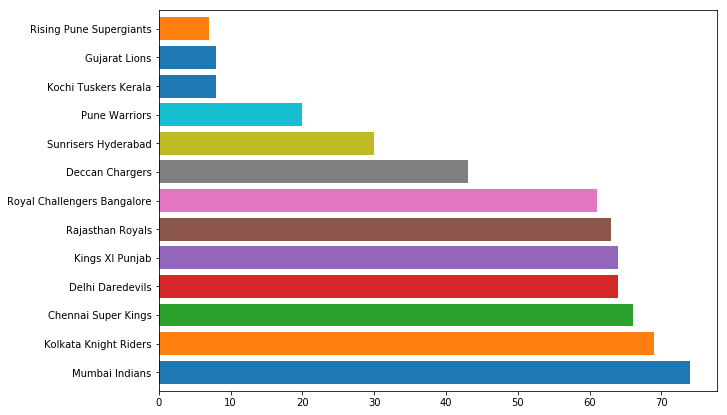

In [80]:
#Maximum Toss Won:
plt.subplots(figsize=(10,7))
ax=data['toss_winner'].value_counts().plot.barh(width=0.8)

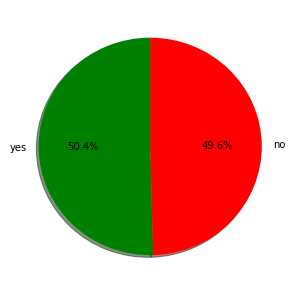

In [79]:
#Teams who had won Toss and Won the match
Tosswin_matchwin=data[data['toss_winner']==data['winner']]
slices=[len(Tosswin_matchwin),(577-len(Tosswin_matchwin))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

Text(0,0.5,'count')

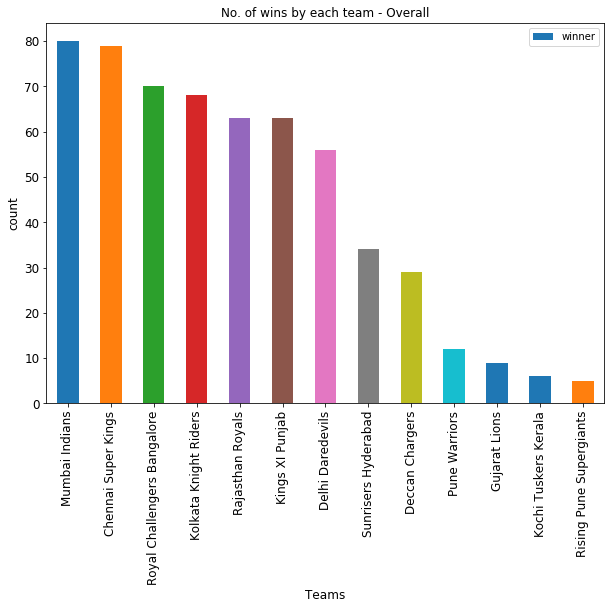

In [63]:
#Plotting the above data Analysis
Total_won = data.winner.value_counts()
ax = Total_won.plot(kind='bar', title ="No. of wins by each team - Overall",figsize=(10,7),legend=True, fontsize=12)
ax.set_xlabel("Teams",fontsize=12)
ax.set_ylabel("count",fontsize=12)

###Inference:

we can see that CSK has the best winning Count among all the teams that have appeared in the league. The number of wins of CSK (79) are only second to MI(80) despite playing 2 seasons less. KKR might peep CSK and come to the second spot by the end of this year’s edition but again they have already played 5 more matches and till the end of edition they would have played atleast 10 more games compared to CSK. Being in top teams despite 2 years ban surely speaks a lot for their dominance over the game.

###How to calculate a Team's winning percentage?

To calculate the winning percentage simply get the total number of games played by adding your wins and losses together. From there divide the number of wins by the total number of games played.

In [64]:
winloss = team_stats['Total won'] / team_stats['Total Matches played']
winloss = pd.DataFrame({'Winloss Ratio': team_stats['Total won'] / team_stats['Total Matches played']})
winloss= winloss.round(2)
team_stats = team_stats.join(winloss)
team_stats

,Teams,Toss won,Total Matches played,Total lost,Total won,Winloss Ratio
0,Chennai Super Kings,66,131,52,79,0.60
1,Deccan Chargers,43,75,46,29,0.39
2,Delhi Daredevils,64,133,77,56,0.42
3,Gujarat Lions,8,16,7,9,0.56
4,Kings XI Punjab,64,134,71,63,0.47
5,Kochi Tuskers Kerala,8,14,8,6,0.43
6,Kolkata Knight Riders,69,132,64,68,0.52
7,Mumbai Indians,74,140,60,80,0.57
8,Pune Warriors,20,46,34,12,0.26
9,Rajasthan Royals,63,118,55,63,0.53


In [66]:
winloss_types = ['Tie/Wins','Tie/Loss','NR']
played =0
winloss_list1 = []

for t in data.team1.unique():
    for wl in winloss_types:
        Tie = 0
        if wl == 'Tie/Wins':             
            Tie = len(data[((data.result == 'tie') & (data.winner == t)) & ((data.team1 == t) | (data.team2 == t))])            
        elif wl == 'Tie/Loss':
            Tie = len(data[((data.result == 'tie') & (data.winner != t)) & ((data.team1 == t) | (data.team2 == t))])
        elif wl == 'NR':
            Tie = len(data[((data.result == 'no result') & (data.winner != t)) & ((data.team1 == t) | (data.team2 == t))])
        if (Tie!= 0):
            winloss_list1.append(Tie)
        else:
            winloss_list1.append(0)
            
winloss_ser1 = pd.Series(winloss_list1, index=pd.MultiIndex.from_product([data.team1.unique(), winloss_types]))
winloss_ser1.unstack()

,NR,Tie/Loss,Tie/Wins
Chennai Super Kings,0,1,0
Deccan Chargers,0,0,0
Delhi Daredevils,2,1,0
Gujarat Lions,0,0,0
Kings XI Punjab,0,0,2
Kochi Tuskers Kerala,0,0,0
Kolkata Knight Riders,0,2,0
Mumbai Indians,0,0,0
Pune Warriors,1,0,0
Rajasthan Royals,1,1,2


In [67]:
winloss_types = ['WinlossTosswin','WinlossBat','WinlossField','winlossTie']
played =0
winloss_list = []
for t in data.team1.unique():
    for wl in winloss_types:
        won, loss, Tie = 0, 0, 0
        if wl == 'WinlossTosswin':
            won = len(data[(data.toss_winner == t) & (data.winner == t)])
            played = len(data[((data.team1 == t) | (data.team2 == t)) &
                 (((data.toss_winner == t) & (data.winner == t))
                  | ((data.toss_winner != t) & (data.winner != t)))])
        if wl == 'WinlossBat':
            won = len(data[(data.winner == t) & (((data.toss_winner == t) & (data.toss_decision == 'bat'))
                  | ((data.toss_winner != t) & (data.toss_decision == 'field')))])
            played = len(data[((data.team1 == t) | (data.team2 == t)) &
                 (((data.toss_winner == t) & (data.toss_decision == 'bat'))
                  | ((data.toss_winner != t) & (data.toss_decision == 'field')))])
        elif wl == 'WinlossField':
            won = len(data[(data.winner == t) & (((data.toss_winner == t) & (data.toss_decision == 'field'))
                  | ((data.toss_winner != t) & (data.toss_decision == 'bat')))])
            played = len(data[((data.team1 == t) | (data.team2 == t)) &
                 (((data.toss_winner == t) & (data.toss_decision == 'field'))
                  | ((data.toss_winner != t) & (data.toss_decision == 'bat')))])
        elif wl == 'winlossTie':
                won =len(data[((data.result == 'tie') & (data.winner == t)) & ((data.team1 == t) | (data.team2 == t))])
                played = len(data[((data.team1 == t) | (data.team2 == t))])
        
        if((won != 0) & (played != 0)):
            winloss_list.append(np.round(won/played,2))
        else:
            winloss_list.append(0)
        
winloss_ser2 = pd.Series(winloss_list, index=pd.MultiIndex.from_product([data.team1.unique(), winloss_types]))
winloss_ser2.unstack()

,WinlossBat,WinlossField,WinlossTosswin,winlossTie
Chennai Super Kings,0.58,0.63,0.60,0.00
Deccan Chargers,0.42,0.34,0.46,0.00
Delhi Daredevils,0.32,0.50,0.41,0.00
Gujarat Lions,0.17,0.80,0.55,0.00
Kings XI Punjab,0.41,0.54,0.44,0.01
Kochi Tuskers Kerala,0.29,0.57,0.50,0.00
Kolkata Knight Riders,0.44,0.59,0.54,0.00
Mumbai Indians,0.57,0.58,0.60,0.00
Pune Warriors,0.30,0.23,0.15,0.00
Rajasthan Royals,0.46,0.59,0.57,0.02


In [68]:
Teams=['Chennai Super Kings','Deccan Chargers','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala','Kolkata Knight Riders','Mumbai Indians','Pune Warriors','Rajasthan Royals','Rising Pune Supergiants','Royal Challengers Bangalore','Sunrisers Hyderabad']
team_stats1 = pd.DataFrame({
         'WinlossTosswin':[0.60,0.46,0.41,0.55,0.44,0.50,0.54,0.60,0.15,0.57,0.38,0.45,0.54],
         'WinlossBat': [0.58,0.42,0.32,0.17, 0.41,0.29,0.44,0.57,0.30,0.46,0.00,0.44,0.49],
         'WinlossField':[0.63,0.34,0.50,0.80,0.54,0.57,0.59,0.58,0.23,0.59,0.71,0.56,0.64],
         'WinlossTie':[0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.02],
         'Tie/Loss':[1,0,1,0,0,0,2,0,0,1,0,1,0],
         'Tie/Win': [0,0,0,0,2,0,0,0,0,2,0,1,1],
         'NR': [0,0,2,0,0,0,0,0,1,1,0,2,0]},index=Teams)
team_stats1 = team_stats1.reset_index()
team_stats1 = team_stats1.rename(index=str, columns={"index": "Teams"})
team_stats1

Total_updates = pd.merge(team_stats,team_stats1, on='Teams')
Total_updates

,Teams,Toss won,Total Matches played,Total lost,Total won,Winloss Ratio,NR,Tie/Loss,Tie/Win,WinlossBat,WinlossField,WinlossTie,WinlossTosswin
0,Chennai Super Kings,66,131,52,79,0.60,0,1,0,0.58,0.63,0.00,0.60
1,Deccan Chargers,43,75,46,29,0.39,0,0,0,0.42,0.34,0.00,0.46
2,Delhi Daredevils,64,133,77,56,0.42,2,1,0,0.32,0.50,0.00,0.41
3,Gujarat Lions,8,16,7,9,0.56,0,0,0,0.17,0.80,0.00,0.55
4,Kings XI Punjab,64,134,71,63,0.47,0,0,2,0.41,0.54,0.01,0.44
5,Kochi Tuskers Kerala,8,14,8,6,0.43,0,0,0,0.29,0.57,0.00,0.50
6,Kolkata Knight Riders,69,132,64,68,0.52,0,2,0,0.44,0.59,0.00,0.54
7,Mumbai Indians,74,140,60,80,0.57,0,0,0,0.57,0.58,0.00,0.60
8,Pune Warriors,20,46,34,12,0.26,1,0,0,0.30,0.23,0.00,0.15
9,Rajasthan Royals,63,118,55,63,0.53,1,1,2,0.46,0.59,0.02,0.57


In [69]:
#Calculating the Winloss for playing in home ground. (WINLOSS-HOME)
home_winner_CSK = len(data[((data.team1 == 'Chennai Super Kings') | (data.team2 == 'Chennai Super Kings')) & ((data.city == 'Chennai') & (data.winner == 'Chennai Super Kings'))])
home_winner_KKR = len(data[((data.team1 == 'Kolkata Knight Riders') | (data.team2 == 'Kolkata Knight Riders')) & ((data.city == 'Kolkata') & (data.winner == 'Kolkata Knight Riders'))])
home_winner_RR = len(data[((data.team1 == 'Rajasthan Royals') | (data.team2 == 'Rajasthan Royals')) & ((data.city == 'Jaipur') & (data.winner == 'Rajasthan Royals'))])
home_winner_MI = len(data[((data.team1 == 'Mumbai Indians') | (data.team2 == 'Mumbai Indians')) & ((data.city == 'Mumbai') & (data.winner == 'Mumbai Indians'))])
home_winner_DC = len(data[((data.team1 == 'Deccan Chargers') | (data.team2 == 'Deccan Chargers')) & ((data.city == 'Hyderabad') & (data.winner == 'Deccan Chargers'))])
home_winner_RCB = len(data[((data.team1 == 'Royal Challengers Bangalore') | (data.team2 == 'Royal Challengers Bangalore')) & ((data.city == 'Bangalore') & (data.winner == 'Royal Challengers Bangalore'))])
home_winner_DD = len(data[((data.team1 == 'Delhi Daredevils') | (data.team2 == 'Delhi Daredevils')) & ((data.city == 'Delhi') & (data.winner == 'Delhi Daredevils'))])
home_winner_KT = len(data[((data.team1 == 'Kochi Tuskers Kerala') | (data.team2 == 'Kochi Tuskers Kerala')) & ((data.city == 'Kochi') & (data.winner == 'Kochi Tuskers Kerala'))])
home_winner_PW = len(data[((data.team1 == 'Pune Warriors') | (data.team2 == 'Pune Warriors')) & ((data.city == 'Pune') & (data.winner == 'Pune Warriors'))])
home_winner_SH = len(data[((data.team1 == 'Sunrisers Hyderabad') | (data.team2 == 'Sunrisers Hyderabad')) & ((data.city == 'Hyderabad') & (data.winner == 'Sunrisers Hyderabad'))])
home_winner_GL = len(data[((data.team1 == 'Gujarat Lions') | (data.team2 == 'Gujarat Lions')) & ((data.city == 'Rajkot') & (data.winner == 'Gujarat Lions'))])
home_winner_RPS = len(data[((data.team1 == 'Rising Pune Supergiants') | (data.team2 == 'Rising Pune Supergiants')) & ((data.city == 'Pune') & (data.winner == 'Rising Pune Supergiants'))])
home_winner_KXP = len(data[((data.team1 == 'Kings XI Punjab') | (data.team2 == 'Kings XI Punjab')) & ((data.city == 'Chandigarh') & (data.winner == 'Kings XI Punjab'))])


total_matches_played_CSK = len(data[((data.team1 == 'Chennai Super Kings') | (data.team2 == 'Chennai Super Kings')) & (data.city == 'Chennai')])
total_matches_played_KKR = len(data[((data.team1 == 'Kolkata Knight Riders') | (data.team2 == 'Kolkata Knight Riders')) & (data.city == 'Kolkata')])
total_matches_played_RR = len(data[((data.team1 == 'Rajasthan Royals') | (data.team2 == 'Rajasthan Royals')) & (data.city == 'Jaipur')])
total_matches_played_MI = len(data[((data.team1 == 'Mumbai Indians') | (data.team2 == 'Mumbai Indians')) & (data.city == 'Mumbai')])
total_matches_played_DC = len(data[((data.team1 == 'Deccan Chargers') | (data.team2 == 'Deccan Chargers')) & (data.city == 'Hyderabad')])
total_matches_played_RCB = len(data[((data.team1 == 'Royal Challengers Bangalore') | (data.team2 == 'Royal Challengers Bangalore')) & (data.city == 'Bangalore')])
total_matches_played_DD = len(data[((data.team1 == 'Delhi Daredevils') | (data.team2 == 'Delhi Daredevils')) & (data.city == 'Delhi')])
total_matches_played_KT = len(data[((data.team1 == 'Kochi Tuskers Kerala') | (data.team2 == 'Kochi Tuskers Kerala')) & (data.city == 'Kochi')])
total_matches_played_PW = len(data[((data.team1 == 'Pune Warriors') | (data.team2 == 'Pune Warriors')) & (data.city == 'Pune')])
total_matches_played_SH = len(data[((data.team1 == 'Sunrisers Hyderabad') | (data.team2 == 'Sunrisers Hyderabad')) & (data.city == 'Hyderabad')])
total_matches_played_GL = len(data[((data.team1 == 'Gujarat Lions') | (data.team2 == 'Gujarat Lions')) & (data.city == 'Rajkot')])
total_matches_played_RPS = len(data[((data.team1 == 'Rising Pune Supergiants') | (data.team2 == 'Rising Pune Supergiants')) & (data.city == 'Pune')])
total_matches_played_KXP = len(data[((data.team1 == 'Kings XI Punjab') | (data.team2 == 'Kings XI Punjab')) & (data.city == 'Chandigarh')])

winloss_home_CSK = home_winner_CSK / total_matches_played_CSK
winloss_home_KKR = home_winner_KKR / total_matches_played_KKR
winloss_home_RR = home_winner_RR / total_matches_played_RR
winloss_home_MI = home_winner_MI / total_matches_played_MI
winloss_home_DC = home_winner_DC / total_matches_played_DC
winloss_home_RCB = home_winner_RCB / total_matches_played_RCB
winloss_home_DD = home_winner_DD / total_matches_played_DD
winloss_home_KT = home_winner_KT / total_matches_played_KT
winloss_home_PW = home_winner_PW / total_matches_played_PW
winloss_home_SH = home_winner_SH / total_matches_played_SH
winloss_home_GL = home_winner_GL / total_matches_played_GL
winloss_home_RPS = home_winner_RPS / total_matches_played_RPS
winloss_home_KXP = home_winner_KXP / total_matches_played_KXP

winlossHome=pd.Series([winloss_home_CSK,winloss_home_DC,winloss_home_DD,winloss_home_GL,winloss_home_KXP,winloss_home_KT,winloss_home_KKR,winloss_home_MI,winloss_home_PW,winloss_home_RR,winloss_home_RPS,winloss_home_RCB,winloss_home_SH],index=['Chennai Super Kings','Deccan Chargers','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala','Kolkata Knight Riders','Mumbai Indians','Pune Warriors','Rajasthan Royals','Rising Pune Supergiants','Royal Challengers Bangalore','Sunrisers Hyderabad'])
winlossHome=pd.DataFrame({'WinlossHome':winlossHome})
winlossHome=winlossHome.round(2)
winlossHome=winlossHome.reset_index()
winlossHome=winlossHome.rename(index=str, columns={"index": "Teams"})


In [70]:
Total_updates = pd.merge(Total_updates,winlossHome, on='Teams')
Total_updates

,Teams,Toss won,Total Matches played,Total lost,Total won,Winloss Ratio,NR,Tie/Loss,Tie/Win,WinlossBat,WinlossField,WinlossTie,WinlossTosswin,WinlossHome
0,Chennai Super Kings,66,131,52,79,0.60,0,1,0,0.58,0.63,0.00,0.60,0.70
1,Deccan Chargers,43,75,46,29,0.39,0,0,0,0.42,0.34,0.00,0.46,0.17
2,Delhi Daredevils,64,133,77,56,0.42,2,1,0,0.32,0.50,0.00,0.41,0.39
3,Gujarat Lions,8,16,7,9,0.56,0,0,0,0.17,0.80,0.00,0.55,0.40
4,Kings XI Punjab,64,134,71,63,0.47,0,0,2,0.41,0.54,0.01,0.44,0.48
5,Kochi Tuskers Kerala,8,14,8,6,0.43,0,0,0,0.29,0.57,0.00,0.50,0.40
6,Kolkata Knight Riders,69,132,64,68,0.52,0,2,0,0.44,0.59,0.00,0.54,0.65
7,Mumbai Indians,74,140,60,80,0.57,0,0,0,0.57,0.58,0.00,0.60,0.67
8,Pune Warriors,20,46,34,12,0.26,1,0,0,0.30,0.23,0.00,0.15,0.25
9,Rajasthan Royals,63,118,55,63,0.53,1,1,2,0.46,0.59,0.02,0.57,0.73


In [71]:
#Calculating the Winloss for playing in other ground. (WINLOSS-AWAY)
away_winner_CSK = len(data[((data.team1 == 'Chennai Super Kings') | (data.team2 == 'Chennai Super Kings')) & ((data.city != 'Chennai') & (data.winner == 'Chennai Super Kings'))])
away_winner_KKR = len(data[((data.team1 == 'Kolkata Knight Riders') | (data.team2 == 'Kolkata Knight Riders')) & ((data.city != 'Kolkata') & (data.winner == 'Kolkata Knight Riders'))])
away_winner_RR = len(data[((data.team1 == 'Rajasthan Royals') | (data.team2 == 'Rajasthan Royals')) & ((data.city != 'Jaipur') & (data.winner == 'Rajasthan Royals'))])
away_winner_MI = len(data[((data.team1 == 'Mumbai Indians') | (data.team2 == 'Mumbai Indians')) & ((data.city != 'Mumbai') & (data.winner == 'Mumbai Indians'))])
away_winner_DC = len(data[((data.team1 == 'Deccan Chargers') | (data.team2 == 'Deccan Chargers')) & ((data.city != 'Hyderabad') & (data.winner == 'Deccan Chargers'))])
away_winner_RCB = len(data[((data.team1 == 'Royal Challengers Bangalore') | (data.team2 == 'Royal Challengers Bangalore')) & ((data.city != 'Bangalore') & (data.winner == 'Royal Challengers Bangalore'))])
away_winner_DD = len(data[((data.team1 == 'Delhi Daredevils') | (data.team2 == 'Delhi Daredevils')) & ((data.city != 'Delhi') & (data.winner == 'Delhi Daredevils'))])
away_winner_KT = len(data[((data.team1 == 'Kochi Tuskers Kerala') | (data.team2 == 'Kochi Tuskers Kerala')) & ((data.city != 'Kochi') & (data.winner == 'Kochi Tuskers Kerala'))])
away_winner_PW = len(data[((data.team1 == 'Pune Warriors') | (data.team2 == 'Pune Warriors')) & ((data.city == 'Pune') & (data.winner != 'Pune Warriors'))])
away_winner_SH = len(data[((data.team1 == 'Sunrisers Hyderabad') | (data.team2 == 'Sunrisers Hyderabad')) & ((data.city != 'Hyderabad') & (data.winner == 'Sunrisers Hyderabad'))])
away_winner_GL = len(data[((data.team1 == 'Gujarat Lions') | (data.team2 == 'Gujarat Lions')) & ((data.city != 'Rajkot') & (data.winner == 'Gujarat Lions'))])
away_winner_RPS = len(data[((data.team1 == 'Rising Pune Supergiants') | (data.team2 == 'Rising Pune Supergiants')) & ((data.city != 'Pune') & (data.winner == 'Rising Pune Supergiants'))])
away_winner_KXP = len(data[((data.team1 == 'Kings XI Punjab') | (data.team2 == 'Kings XI Punjab')) & ((data.city != 'Chandigarh') & (data.winner == 'Kings XI Punjab'))])

total_matches_played_CSK1 = len(data[((data.team1 == 'Chennai Super Kings') | (data.team2 == 'Chennai Super Kings')) & (data.city != 'Chennai')])
total_matches_played_KKR1 = len(data[((data.team1 == 'Kolkata Knight Riders') | (data.team2 == 'Kolkata Knight Riders')) & (data.city != 'Kolkata')])
total_matches_played_RR1 = len(data[((data.team1 == 'Rajasthan Royals') | (data.team2 == 'Rajasthan Royals')) & (data.city != 'Jaipur')])
total_matches_played_MI1 = len(data[((data.team1 == 'Mumbai Indians') | (data.team2 == 'Mumbai Indians')) & (data.city != 'Mumbai')])
total_matches_played_DC1 = len(data[((data.team1 == 'Deccan Chargers') | (data.team2 == 'Deccan Chargers')) & (data.city != 'Hyderabad')])
total_matches_played_RCB1 = len(data[((data.team1 == 'Royal Challengers Bangalore') | (data.team2 == 'Royal Challengers Bangalore')) & (data.city != 'Bangalore')])
total_matches_played_DD1 = len(data[((data.team1 == 'Delhi Daredevils') | (data.team2 == 'Delhi Daredevils')) & (data.city != 'Delhi')])
total_matches_played_KT1 = len(data[((data.team1 == 'Kochi Tuskers Kerala') | (data.team2 == 'Kochi Tuskers Kerala')) & (data.city != 'Kochi')])
total_matches_played_PW1 = len(data[((data.team1 == 'Pune Warriors') | (data.team2 == 'Pune Warriors')) & (data.city != 'Pune')])
total_matches_played_SH1 = len(data[((data.team1 == 'Sunrisers Hyderabad') | (data.team2 == 'Sunrisers Hyderabad')) & (data.city != 'Hyderabad')])
total_matches_played_GL1 = len(data[((data.team1 == 'Gujarat Lions') | (data.team2 == 'Gujarat Lions')) & (data.city != 'Rajkot')])
total_matches_played_RPS1 = len(data[((data.team1 == 'Rising Pune Supergiants') | (data.team2 == 'Rising Pune Supergiants')) & (data.city != 'Pune')])
total_matches_played_KXP1 = len(data[((data.team1 == 'Kings XI Punjab') | (data.team2 == 'Kings XI Punjab')) & (data.city != 'Chandigarh')])

winloss_away_CSK = away_winner_CSK / total_matches_played_CSK1
winloss_away_KKR = away_winner_KKR / total_matches_played_KKR1
winloss_away_RR = away_winner_RR / total_matches_played_RR1
winloss_away_MI = away_winner_MI / total_matches_played_MI1
winloss_away_DC = away_winner_DC / total_matches_played_DC1
winloss_away_RCB = away_winner_RCB / total_matches_played_RCB1
winloss_away_DD = away_winner_DD / total_matches_played_DD1
winloss_away_KT = away_winner_KT / total_matches_played_KT1
winloss_away_PW = away_winner_PW / total_matches_played_PW1
winloss_away_SH = away_winner_SH / total_matches_played_SH1
winloss_away_GL = away_winner_GL / total_matches_played_GL1
winloss_away_RPS = away_winner_RPS / total_matches_played_RPS1
winloss_away_KXP = away_winner_KXP / total_matches_played_KXP1

winlossAway=pd.Series([winloss_away_CSK,winloss_away_DC,winloss_away_DD,winloss_away_GL,winloss_away_KXP,winloss_away_KT,winloss_away_KKR,winloss_away_MI,winloss_away_PW,winloss_away_RR,winloss_away_RPS,winloss_away_RCB,winloss_away_SH],index=['Chennai Super Kings','Deccan Chargers','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala','Kolkata Knight Riders','Mumbai Indians','Pune Warriors','Rajasthan Royals','Rising Pune Supergiants','Royal Challengers Bangalore','Sunrisers Hyderabad'])
winlossAway= pd.DataFrame({'WinlossAway':winlossAway})
winlossAway=winlossAway.round(2)
winlossAway= winlossAway.reset_index()
winlossAway= winlossAway.rename(index=str, columns={"index": "Teams"})

In [72]:
Record_Summary = pd.merge(Total_updates,winlossAway, on='Teams')
Record_Summary

,Teams,Toss won,Total Matches played,Total lost,Total won,Winloss Ratio,NR,Tie/Loss,Tie/Win,WinlossBat,WinlossField,WinlossTie,WinlossTosswin,WinlossHome,WinlossAway
0,Chennai Super Kings,66,131,52,79,0.60,0,1,0,0.58,0.63,0.00,0.60,0.70,0.55
1,Deccan Chargers,43,75,46,29,0.39,0,0,0,0.42,0.34,0.00,0.46,0.17,0.46
2,Delhi Daredevils,64,133,77,56,0.42,2,1,0,0.32,0.50,0.00,0.41,0.39,0.44
3,Gujarat Lions,8,16,7,9,0.56,0,0,0,0.17,0.80,0.00,0.55,0.40,0.64
4,Kings XI Punjab,64,134,71,63,0.47,0,0,2,0.41,0.54,0.01,0.44,0.48,0.47
5,Kochi Tuskers Kerala,8,14,8,6,0.43,0,0,0,0.29,0.57,0.00,0.50,0.40,0.44
6,Kolkata Knight Riders,69,132,64,68,0.52,0,2,0,0.44,0.59,0.00,0.54,0.65,0.43
7,Mumbai Indians,74,140,60,80,0.57,0,0,0,0.57,0.58,0.00,0.60,0.67,0.50
8,Pune Warriors,20,46,34,12,0.26,1,0,0,0.30,0.23,0.00,0.15,0.25,0.40
9,Rajasthan Royals,63,118,55,63,0.53,1,1,2,0.46,0.59,0.02,0.57,0.73,0.46


Historically home games haven't been a huge advantage for teams, but in year 2016 of the first 23 matches have been won by the home side.

[titles]!(img/IPL.png)